In [51]:
## Imports
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [52]:
dataset = MNIST(root = 'data/', download = True)

In [53]:
## MNIST dataset(images and labels)
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [54]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [55]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])

In [56]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [57]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
model = nn.Linear(input_size, num_classes)

In [58]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})
    
    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
    
model = MnistModel()

In [59]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [60]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.321348190307617, 'val_acc': 0.06368670612573624}

In [61]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9477, val_acc: 0.6456
Epoch [1], val_loss: 1.6770, val_acc: 0.7316
Epoch [2], val_loss: 1.4754, val_acc: 0.7631
Epoch [3], val_loss: 1.3236, val_acc: 0.7795
Epoch [4], val_loss: 1.2070, val_acc: 0.7907


In [62]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1156, val_acc: 0.8005
Epoch [1], val_loss: 1.0424, val_acc: 0.8071
Epoch [2], val_loss: 0.9826, val_acc: 0.8138
Epoch [3], val_loss: 0.9328, val_acc: 0.8198
Epoch [4], val_loss: 0.8909, val_acc: 0.8241


In [63]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8549, val_acc: 0.8280
Epoch [1], val_loss: 0.8238, val_acc: 0.8310
Epoch [2], val_loss: 0.7966, val_acc: 0.8346
Epoch [3], val_loss: 0.7726, val_acc: 0.8370
Epoch [4], val_loss: 0.7512, val_acc: 0.8388


In [64]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7320, val_acc: 0.8409
Epoch [1], val_loss: 0.7146, val_acc: 0.8420
Epoch [2], val_loss: 0.6989, val_acc: 0.8438
Epoch [3], val_loss: 0.6846, val_acc: 0.8445
Epoch [4], val_loss: 0.6714, val_acc: 0.8471


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

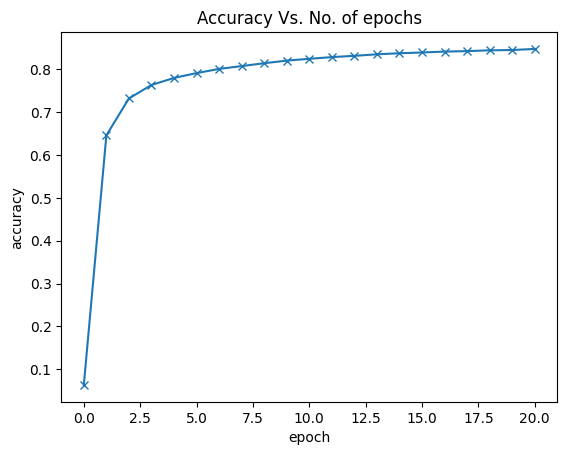

In [65]:
## Replace these values with your result
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')

In [66]:
## Define the test dataset
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

In [67]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

In [68]:
import random as rd
rand_nums = rd.sample(range(1,5000),5)
rand_nums

[13, 823, 1890, 4681, 1052]

Label: 0 , Predicted : 0
Label: 2 , Predicted : 2
Label: 2 , Predicted : 2
Label: 9 , Predicted : 4
Label: 8 , Predicted : 8


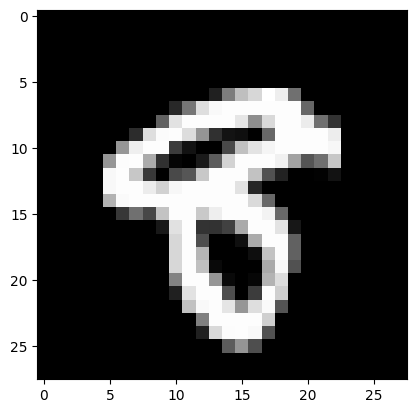

In [69]:
for x in rand_nums:
    img, label = test_dataset[x]
    plt.imshow(img[0], cmap = 'gray')
    print('Label:', label, ', Predicted :', predict_image(img, model))

In [70]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6411383152008057, 'val_acc': 0.85986328125}

In [71]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [72]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 3.0991e-02, -2.2714e-02, -1.5010e-02,  ...,  1.4569e-02,
                        3.4171e-02,  3.3741e-02],
                      [-1.3701e-02, -3.1767e-03, -3.3421e-02,  ...,  1.6134e-02,
                        3.2843e-02,  3.3276e-02],
                      [ 9.9031e-04,  2.1065e-02,  8.6132e-03,  ...,  3.2385e-02,
                        1.6938e-02,  2.1516e-03],
                      ...,
                      [-1.6038e-05,  2.1934e-02,  3.0262e-03,  ...,  1.0323e-02,
                       -6.0592e-03,  1.7862e-02],
                      [-2.9928e-02, -2.2219e-02, -2.9165e-02,  ...,  2.0050e-04,
                        7.9557e-03,  1.3540e-02],
                      [-2.6245e-02,  1.3157e-02,  1.6702e-02,  ..., -1.7365e-02,
                        6.3210e-03,  1.1506e-02]])),
             ('linear.bias',
              tensor([-0.0497,  0.1075, -0.0228, -0.0535,  0.0440,  0.0563,  0.0105,  0.0231,
                      -0.0619,

In [73]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 3.0991e-02, -2.2714e-02, -1.5010e-02,  ...,  1.4569e-02,
                        3.4171e-02,  3.3741e-02],
                      [-1.3701e-02, -3.1767e-03, -3.3421e-02,  ...,  1.6134e-02,
                        3.2843e-02,  3.3276e-02],
                      [ 9.9031e-04,  2.1065e-02,  8.6132e-03,  ...,  3.2385e-02,
                        1.6938e-02,  2.1516e-03],
                      ...,
                      [-1.6038e-05,  2.1934e-02,  3.0262e-03,  ...,  1.0323e-02,
                       -6.0592e-03,  1.7862e-02],
                      [-2.9928e-02, -2.2219e-02, -2.9165e-02,  ...,  2.0050e-04,
                        7.9557e-03,  1.3540e-02],
                      [-2.6245e-02,  1.3157e-02,  1.6702e-02,  ..., -1.7365e-02,
                        6.3210e-03,  1.1506e-02]])),
             ('linear.bias',
              tensor([-0.0497,  0.1075, -0.0228, -0.0535,  0.0440,  0.0563,  0.0105,  0.0231,
                      -0.0619,

In [74]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6411383152008057, 'val_acc': 0.85986328125}